<a href="https://colab.research.google.com/github/denise-fi/Tarea2_2_IA/blob/main/ejercicio1_tarea2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('./housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

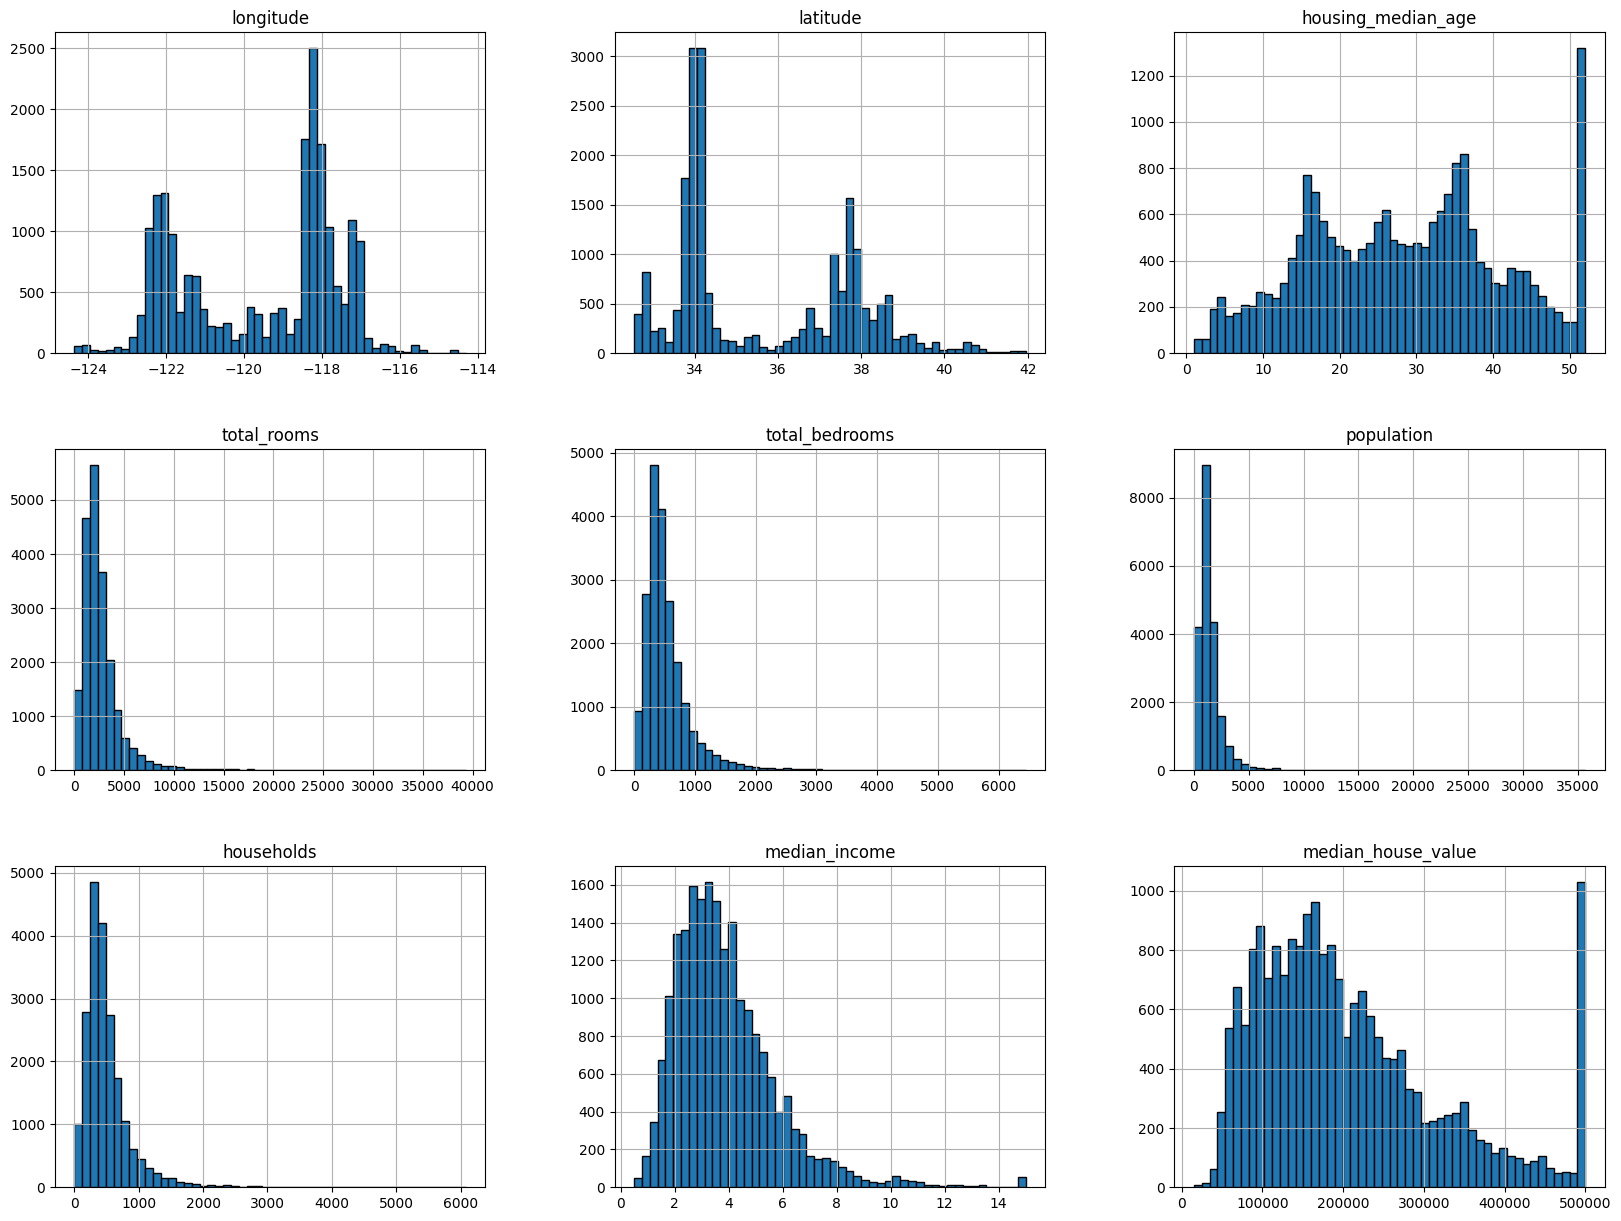

In [6]:
df.hist(bins=50, figsize=(20, 15), edgecolor='black')

In [8]:
datos = df.dropna()

<Axes: xlabel='latitude', ylabel='longitude'>

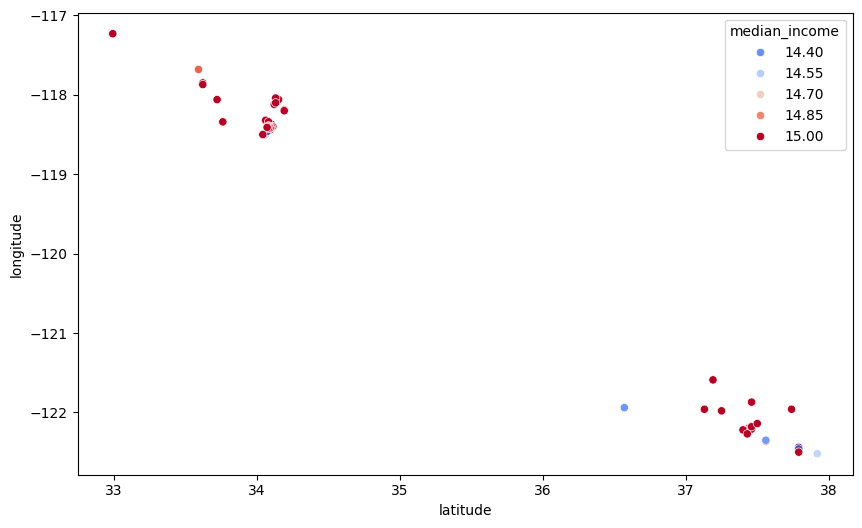

In [9]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=datos[datos['median_income'] > 14], x='latitude', y='longitude',
               hue='median_income', palette='coolwarm')

Text(0, 0.5, 'Frecuencia')

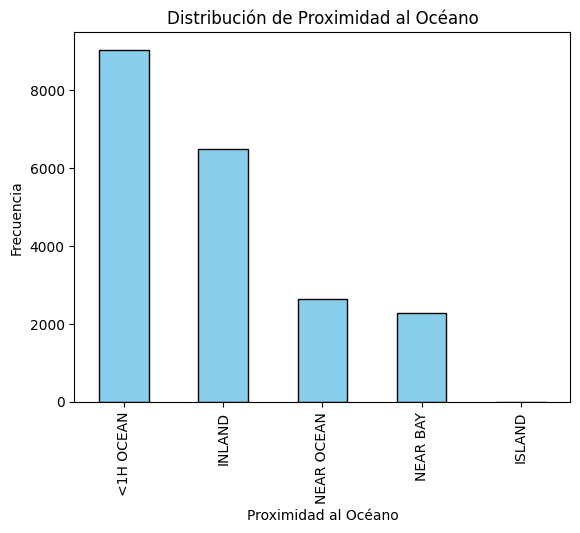

In [10]:
datos['ocean_proximity'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de Proximidad al Océano")
plt.xlabel("Proximidad al Océano")
plt.ylabel("Frecuencia")

In [11]:
dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)
datos = pd.concat([datos, dummies], axis=1)
datos.drop('ocean_proximity', axis=1, inplace=True)

<Axes: >

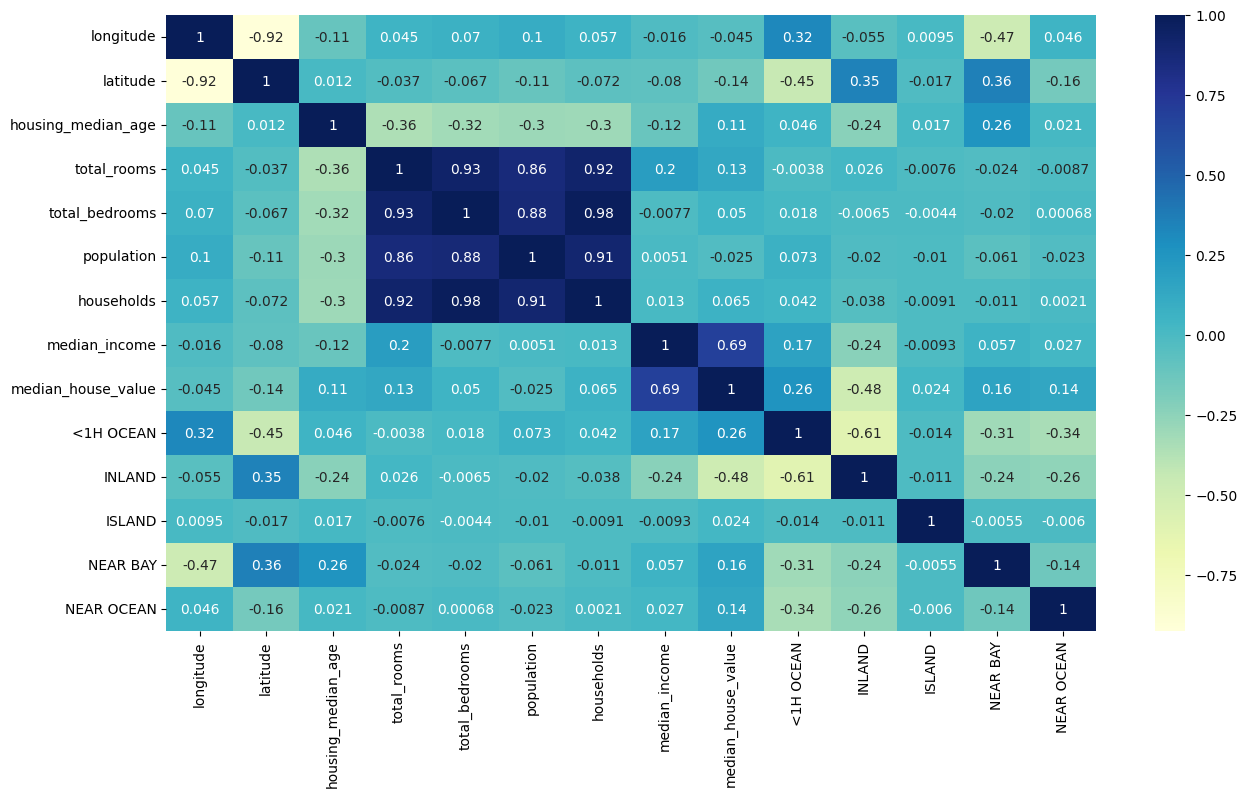

In [12]:
plt.figure(figsize=(15, 8))
sb.heatmap(datos.corr(), annot=True, cmap='YlGnBu')

In [13]:
datos['room_ratio'] = datos['total_rooms'] / datos['total_bedrooms']

In [14]:
datos.corr()['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
room_ratio,0.383920
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686


In [15]:
X = datos.drop('median_house_value', axis=1)
y = datos['median_house_value']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
predicciones = modelo.predict(X_test_scaled)
train_score = modelo.score(X_train_scaled, y_train)
test_score = modelo.score(X_test_scaled, y_test)

In [21]:
print(f"Precisión en entrenamiento: {train_score:.2f}")
print(f"Precisión en prueba: {test_score:.2f}")

Precisión en entrenamiento: 0.65
Precisión en prueba: 0.65


Text(0, 0.5, 'Frecuencia')

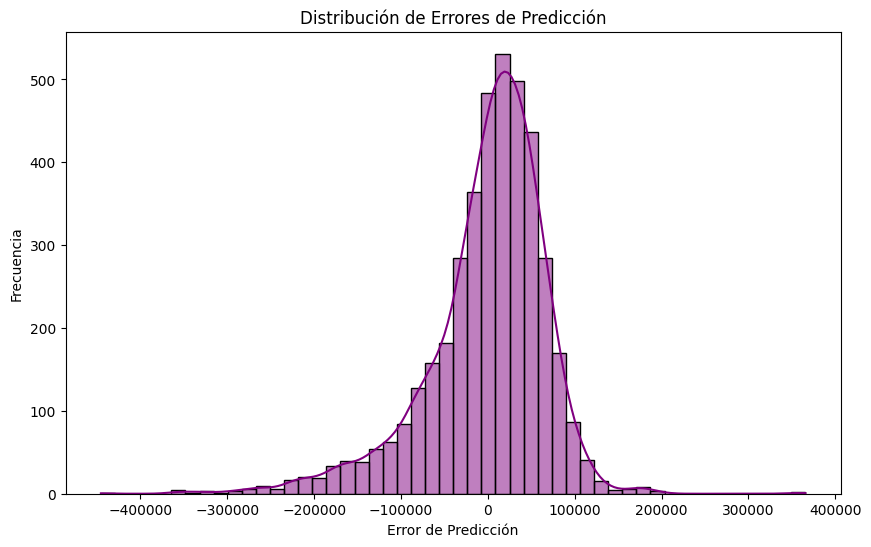

In [22]:
errores = predicciones - y_test
plt.figure(figsize=(10, 6))
sb.histplot(errores, bins=50, kde=True, color='purple')
plt.title("Distribución de Errores de Predicción")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")

In [23]:
mse = np.sqrt(mean_squared_error(y_test, predicciones))

In [24]:
mse

69257.88641799583

In [ ]:
#¿El resultado fue mejor o peor?
#Fue mejor

#¿Por qué crees que es así? Por qué son necesarios los cambios aplicados
#Agregar o transformar características aumenta la relevancia de las características en relación con el precio de la vivienda
#Crear una nueva característica que represente la densidad de habitaciones.
#Crear una razón entre la cantidad de habitaciones y las viviendas.